In [28]:
using Pkg
Pkg.update()
Pkg.add(["SpaceLiDAR", "GeoDataFrames", "DataFrames", "GeoFormatTypes", "Extents"])

    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/Deltares/PointCloudRasterizers.jl`
   Installed OpenSSL ─ v1.3.3
   Installed HTTP ──── v1.7.0
  No Changes to `~/code/Project.toml`
    Updating `~/code/Manifest.toml`
  [cd3eb016] ↑ HTTP v1.6.3 ⇒ v1.7.0
  [4d8831e6] ↑ OpenSSL v1.3.2 ⇒ v1.3.3
Precompiling project...
  ✓ OpenSSL
  ✓ HTTP
  ✓ GitHub
  ✓ GR
  ✓ AWS
  ✓ AWSS3
  ✓ SpaceLiDAR
  ✓ Plots
  8 dependencies successfully precompiled in 26 seconds. 288 already precompiled.
  8 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
   Resolving package versions...
  No Changes to `~/code/Project.toml`
  No Changes to `~/code/Manifest.toml`


# SpaceLiDAR
Using the SpaceLiDAR package to search and process spaceborne LiDAR such as ICESat-2.

In [29]:
using SpaceLiDAR, GeoDataFrames, GeoFormatTypes, DataFrames, Plots, Extents

In [30]:
granules = search(:ICESat2, :ATL08; bbox=Extent(X=(38, 39), Y=(-27, -26)))

183-element Vector{ICESat2_Granule}:
 ICESat2_Granule{:ATL08}("ATL08_20181014005051_02350108_005_01.h5", "https://n5eil01u.ecs.nsidc.org/DP7/ATLAS/ATL08.005/2018.10.14/ATL08_20181014005051_02350108_005_01.h5", (type = :ATL08, date = Dates.DateTime("2018-10-14T00:50:51"), rgt = 235, cycle = 1, segment = 8, version = 5, revision = 1, ascending = false, descending = true), [[[[4.9499557881874665, 41.521076036328765], [-11.899199261570079, 39.7957964484429], [-11.887646019368367, 39.46496336590792], [4.96130343159519, 41.19612309859468], [4.9499557881874665, 41.521076036328765]]]])
 ICESat2_Granule{:ATL08}("ATL08_20181021124004_03490114_005_01.h5", "https://n5eil01u.ecs.nsidc.org/DP7/ATLAS/ATL08.005/2018.10.21/ATL08_20181021124004_03490114_005_01.h5", (type = :ATL08, date = Dates.DateTime("2018-10-21T12:40:04"), rgt = 349, cycle = 1, segment = 14, version = 5, revision = 1, ascending = true, descending = false), [[[[-26.33188734017545, 38.72580110100056], [-9.297497024587571, 36.9338533415

In [31]:
granules[1]

ICESat2_Granule{:ATL08}("ATL08_20181014005051_02350108_005_01.h5", "https://n5eil01u.ecs.nsidc.org/DP7/ATLAS/ATL08.005/2018.10.14/ATL08_20181014005051_02350108_005_01.h5", (type = :ATL08, date = Dates.DateTime("2018-10-14T00:50:51"), rgt = 235, cycle = 1, segment = 8, version = 5, revision = 1, ascending = false, descending = true), [[[[4.9499557881874665, 41.521076036328765], [-11.899199261570079, 39.7957964484429], [-11.887646019368367, 39.46496336590792], [4.96130343159519, 41.19612309859468], [4.9499557881874665, 41.521076036328765]]]])

In [32]:
fn = "ATL08_20201121151145_08920913_005_01.h5"
g = SpaceLiDAR.granule_from_file(fn)

ICESat2_Granule{:ATL08}("ATL08_20201121151145_08920913_005_01.h5", "ATL08_20201121151145_08920913_005_01.h5", (type = :ATL08, date = Dates.DateTime("2020-11-21T15:11:45"), rgt = 892, cycle = 9, segment = 13, version = 5, revision = 1, ascending = true, descending = false), Vector{Vector{Vector{Float64}}}[])

In [33]:
df = DataFrame(g)

Row,longitude,latitude,height,height_error,datetime,quality,phr,sensitivity,scattered,saturated,clouds,track,strong_beam,classification,height_reference,detector_id
,Float32,Float32,Float32,Float32,DateTime,Bool,Bool,Float32,Int16,Int16,Bool,String,Bool,String,Float32,Int8
1,175.884,-41.5615,12.6655,0.110167,2020-11-21T15:14:15.460,true,false,8.24315,3,0,true,gt1l,true,ground,13.1176,1
2,175.883,-41.5606,12.6189,0.106966,2020-11-21T15:14:15.474,true,false,8.24315,3,0,true,gt1l,true,ground,13.1276,1
3,175.883,-41.5597,12.6113,0.100929,2020-11-21T15:14:15.488,true,false,8.24315,3,0,true,gt1l,true,ground,13.1375,1
4,175.883,-41.5588,12.9684,0.103775,2020-11-21T15:14:15.502,true,false,8.24315,3,0,true,gt1l,true,ground,13.1476,1
5,175.883,-41.5579,13.1796,0.122059,2020-11-21T15:14:15.516,true,false,8.24315,3,0,true,gt1l,true,ground,13.1578,1
6,175.883,-41.5571,12.8809,0.108271,2020-11-21T15:14:15.530,true,false,8.24315,3,0,true,gt1l,true,ground,13.168,1
7,175.883,-41.5562,12.3385,0.0907559,2020-11-21T15:14:15.544,true,false,8.24315,3,0,true,gt1l,true,ground,13.1782,1
8,175.883,-41.5553,12.7469,0.092406,2020-11-21T15:14:15.559,true,false,8.24315,3,0,true,gt1l,true,ground,13.1885,1
9,175.883,-41.5544,12.9122,0.105006,2020-11-21T15:14:15.573,true,false,8.24315,3,0,true,gt1l,true,ground,13.1987,1


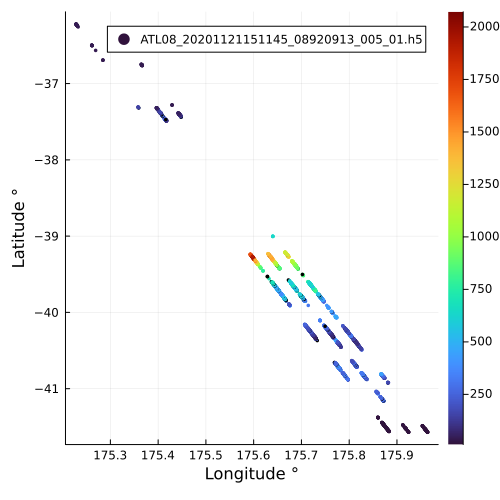

In [34]:
scatter(df.longitude, df.latitude, markersize=2, zcolor=df.height, color=:turbo, markerstrokewidth=0, label=g.id, xlabel="Longitude °", ylabel="Latitude °", size=(500,500))

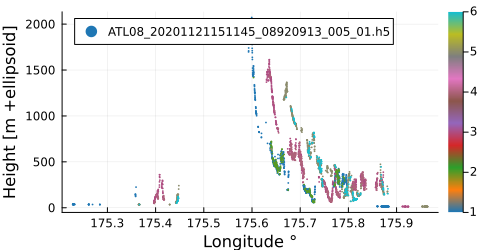

In [35]:
scatter(df.longitude, df.height, markersize=1, zcolor=df.detector_id, color=:tab10, markerstrokewidth=0, label=g.id, xlabel="Longitude °", ylabel="Height [m +ellipsoid]", size=(500,250))

In [36]:
GeoDataFrames.write("test.gpkg", df)

LoadError: ArgumentError: column name :geometry not found in the data frame

histogram(last.(df.geometry))

In [37]:
df.geometry .= GeoDataFrames.createpoint.(df.longitude, df.latitude, df.height)

3700-element Vector{ArchGDAL.IGeometry{ArchGDAL.wkbPoint25D}}:
 Geometry: POINT (175.883529663086 -41.5615272521973 12.6655292510986)
 Geometry: POINT (175.883422851562 -41.5606346130371 12.6189317703247)
 Geometry: POINT (175.88330078125 -41.5597381591797 12.6112632751465)
 Geometry: POINT (175.883193969727 -41.5588417053223 12.968355178833)
 Geometry: POINT (175.883087158203 -41.5579490661621 13.179630279541)
 Geometry: POINT (175.882965087891 -41.5570526123047 12.8808727264404)
 Geometry: POINT (175.882858276367 -41.5561561584473 12.3384952545166)
 Geometry: POINT (175.882736206055 -41.5552635192871 12.7469310760498)
 Geometry: POINT (175.882629394531 -41.5543670654297 12.9121685028076)
 Geometry: POINT (175.882507324219 -41.5534744262695 12.8719272613525)
 Geometry: POINT (175.882400512695 -41.5525779724121 12.6716537475586)
 Geometry: POINT (175.882278442383 -41.551685333252 12.8957529067993)
 Geometry: POINT (175.882171630859 -41.5507888793945 12.7436504364014)
 ⋮
 Geometry: POIN

In [38]:
GeoDataFrames.write("test.gpkg", df, crs=GeoFormatTypes.EPSG(4326))

"test.gpkg"